# Decision Tree Notes

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

# read Iris data from pydatset
df = data('iris')

df.head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [2]:
# convert column names to lowercase, replace '.' in column names with '_'
df.columns = [col.lower().replace('.', '_') for col in df]

### TRAIN VALIDATE TEST

In [3]:
from sklearn.model_selection import train_test_split

def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return train, validate, test


In [4]:
# split into train, validate, test
train, validate, test = train_validate_test_split(df, target='species', seed=123)

# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = train.drop(columns=['species'])
y_train = train.species

X_validate = validate.drop(columns=['species'])
y_validate = validate.species

X_test = test.drop(columns=['species'])
y_test = test.species

### Train Model

**Create the object**

In [5]:
# for classification you can change the algorithm to gini or entropy (information gain).  
# Default is gini.

clf = DecisionTreeClassifier(max_depth=3, random_state=123)

**fit the model**

In [6]:
# model.fit(X, y)

clf = clf.fit(X_train, y_train)

Visualize a Decision Tree

[Text(0.3333333333333333, 0.875, 'petal_length <= 2.6\ngini = 0.667\nsamples = 84\nvalue = [28, 28, 28]\nclass = setosa'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 28\nvalue = [28, 0, 0]\nclass = setosa'),
 Text(0.5, 0.625, 'petal_length <= 4.75\ngini = 0.5\nsamples = 56\nvalue = [0, 28, 28]\nclass = versicolor'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 25\nvalue = [0, 25, 0]\nclass = versicolor'),
 Text(0.6666666666666666, 0.375, 'petal_length <= 4.95\ngini = 0.175\nsamples = 31\nvalue = [0, 3, 28]\nclass = virginica'),
 Text(0.5, 0.125, 'gini = 0.5\nsamples = 4\nvalue = [0, 2, 2]\nclass = versicolor'),
 Text(0.8333333333333334, 0.125, 'gini = 0.071\nsamples = 27\nvalue = [0, 1, 26]\nclass = virginica')]

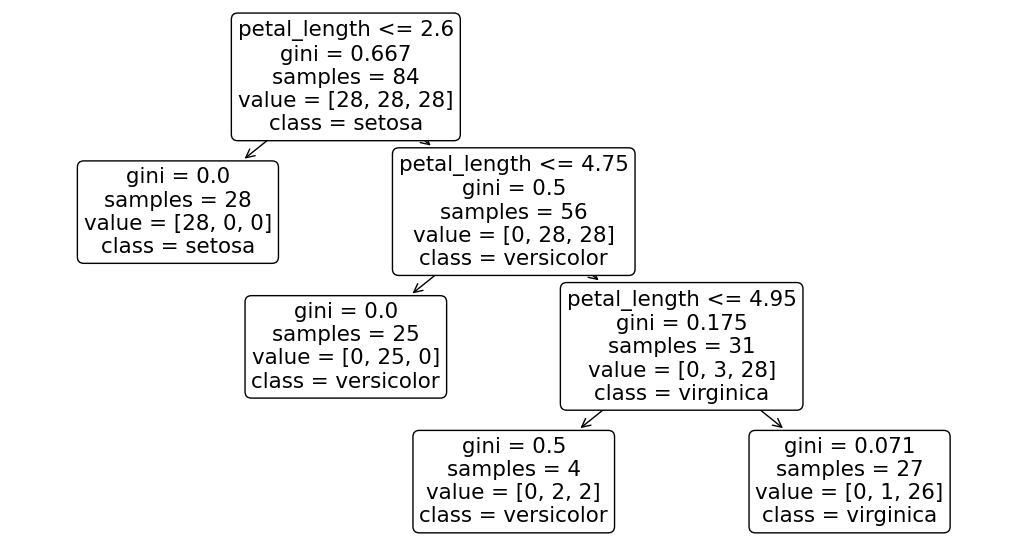

In [7]:
plt.figure(figsize=(13, 7))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_, rounded=True)

**Make Predictions**

In [8]:
# make prediction on train obeservations

y_pred = clf.predict(X_train)
y_pred[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'setosa'],
      dtype=object)

**Estimate Probability**

In [9]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.03703704, 0.96296296],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ]])

### Evaluate Model

Compute the Accuracy

In [11]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.96


**Create a confusion matrix**

- True Positive: number of occurrences where y is true and y is predicted true.
- True Negative: number of occurrences where y is false and y is predicted false.
- False Positive: number of occurrences where y is false and y is predicted true.
- False Negative: number of occurrences where y is true and y is predicted false.

In [12]:
# confusion matrix

confusion_matrix(y_train, y_pred)

array([[28,  0,  0],
       [ 0, 27,  1],
       [ 0,  2, 26]])

In [13]:
y_train.value_counts()

versicolor    28
setosa        28
virginica     28
Name: species, dtype: int64

In [14]:
import pandas as pd

labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)


,setosa,versicolor,virginica
setosa,28,0,0
versicolor,0,27,1
virginica,0,2,26


**Create a classificaiton report**

Precision: the higher this number is, the more you were able to pinpoint all positives correctly. If this is a low score, you predicted a lot of positives where there were none. 
T
P
(
T
P
+
F
P
)

Recall: if this score is high, you didn’t miss a lot of positives. But as it gets lower, you are not predicting the positives that are actually there. 
T
P
(
T
P
+
F
N
)

f1-score: The balanced harmonic mean of Recall and Precision, giving both metrics equal weight. The higher the F-Measure is, the better. 
∈
[
0
,
1
]

Support: number of occurrences of each class in where y is true.

In [15]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        28
  versicolor       0.93      0.96      0.95        28
   virginica       0.96      0.93      0.95        28

    accuracy                           0.96        84
   macro avg       0.96      0.96      0.96        84
weighted avg       0.96      0.96      0.96        84



### Evaluate the Model with our Validate dataset

**Compute the accuracy of the model when run on the validate data**
    
- Because we didn't do exploration or train on validate, it is "out-of-sample".
- Evaluating on validate means we're learning how well the model does on new data.

In [17]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.94


In [18]:
# And since accuracy isn't everything

# Produce y_predictions that come from the X_validate
y_pred = clf.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.86      1.00      0.92        12
   virginica       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.94        36
weighted avg       0.95      0.94      0.94        36



### Avoid Overfitting

- Obtain more training data (this is always the first answer)

- Feature engineering

- The simplest approach is to set your max_depth argument to a lower integer)

- Some other concepts:
  
    - Use a validate split to ensure we're not overfitting hyperparameters on train

    - Tree pruning

        - Pre-modeling - setting max depth before training your model (or training your model then cranking down the max_depth)

        - Post modeling pruning - go for totally overfit, then then prune that overfit tree. sklearn goes into more detail here

- For more on validate and test sets, see https://machinelearningmastery.com/difference-test-validation-datasets/
